In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

Connet to the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read image and convert it to a torch tensor (channels, rows, columns) and display it.

torch.Size([3, 408, 612])


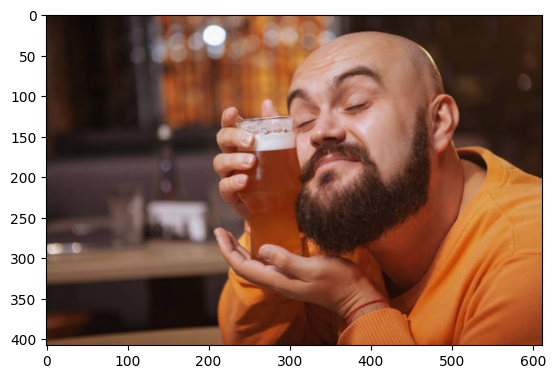

In [ ]:
img = torchvision.io.read_image('./drive/MyDrive/Fall2024_DeepLearning/Week3/beer.jpg')
print(img.shape)
plt.imshow(img.permute(1,2,0))

Differnt padding schemes. Check https://pytorch.org/docs/stable/generated/torch.nn.functional.pad.html and try something else!

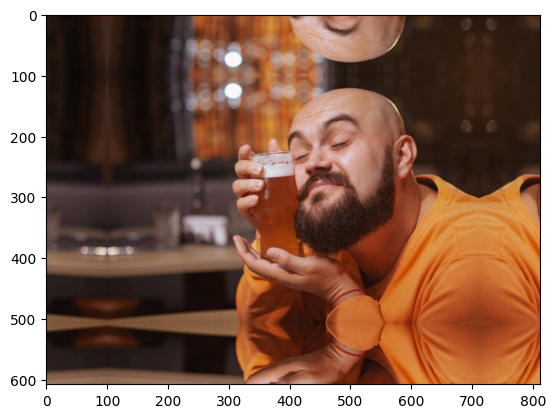

In [ ]:
out = torch.nn.functional.pad(img, (100,100,100,100), 'reflect')
plt.imshow(out.permute(1,2,0))

Convert the image to a grayscale for simplicty by averaging over the channel values

Min. value = tensor(6.6667)
Max. value = tensor(254.)


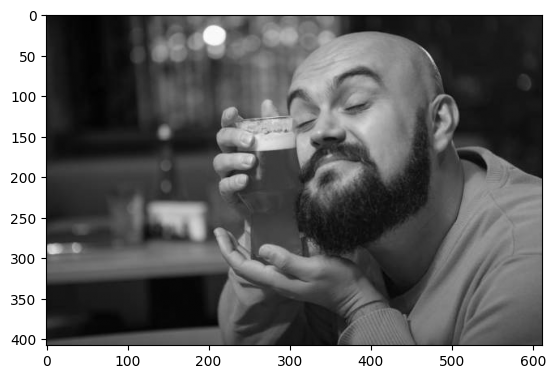

In [ ]:
if img.shape[0] > 1:
  grayscale_img = img.float().mean(dim=0, keepdim=True)
  plt.imshow(grayscale_img.permute(1,2,0), cmap = 'gray')
  print('Min. value = ' + str(grayscale_img.min()))
  print('Max. value = ' + str(grayscale_img.max()))
else:
  grayscale_img = img.float()

Scale the image to range [0,1]

Min. value = tensor(0.0261)
Max. value = tensor(0.9961)
Tensor shape = torch.Size([1, 408, 612])


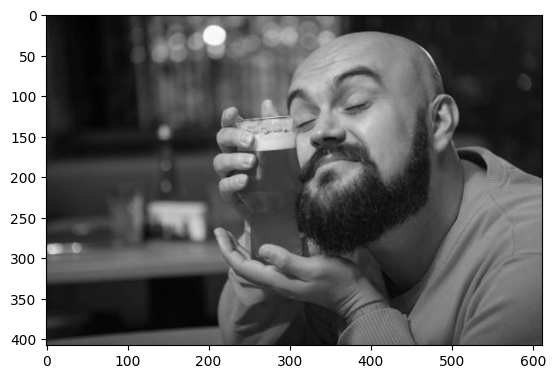

In [ ]:
grayscale_img_norm = grayscale_img / 255
plt.imshow(grayscale_img_norm.permute(1,2,0), cmap = 'gray')
print('Min. value = ' + str(grayscale_img_norm.min()))
print('Max. value = ' + str(grayscale_img_norm.max()))
print('Tensor shape = ' + str(grayscale_img_norm.shape))

In torch, the dimension should be (batch, channels, rows, columns), therefore, we add an empty dimension at location 0

In [ ]:
grayscale_img_norm = grayscale_img_norm.unsqueeze(0)
print('Tensor shape = ' + str(grayscale_img_norm.shape))

Tensor shape = torch.Size([1, 1, 408, 612])


Initialize weights for a kernal/filter

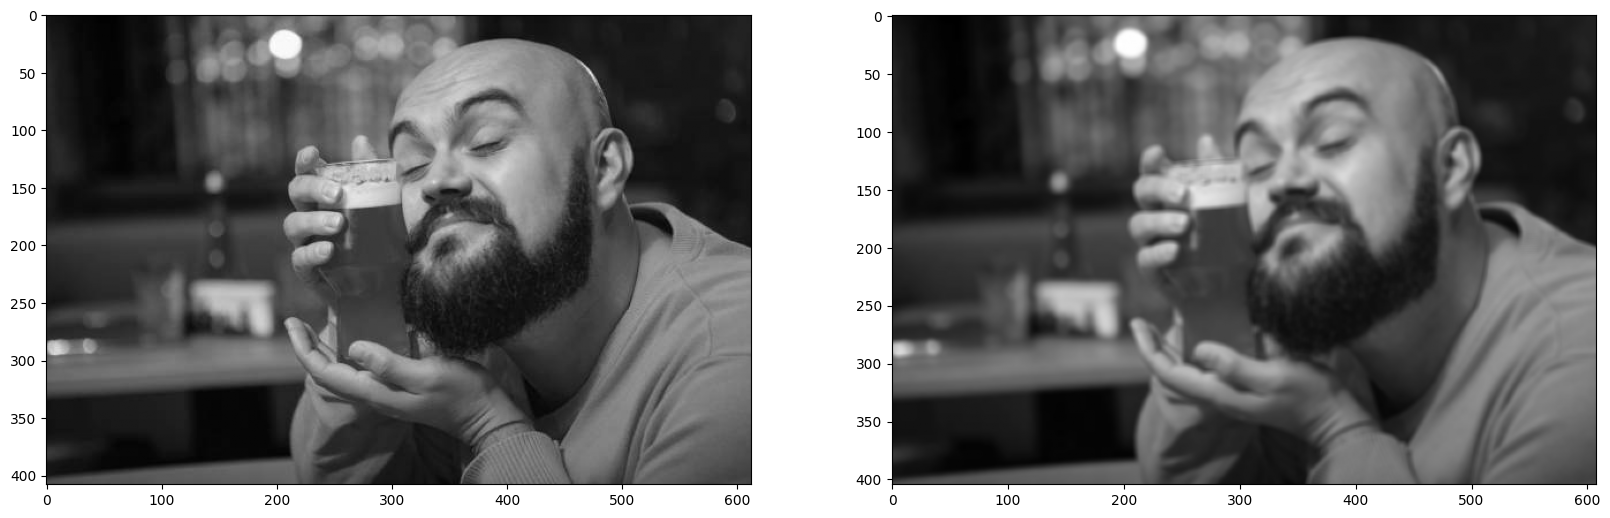

In [ ]:
w = np.ones((grayscale_img_norm.shape[1], 5, 5)) / (grayscale_img_norm.shape[1]*5*5)
w = w.astype(np.float32)
weight = torch.from_numpy(w).unsqueeze(0)
result = torch.conv2d(grayscale_img_norm, weight)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_img_norm.squeeze(0).permute(1,2,0), cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(result.squeeze(0).permute(1,2,0), cmap = 'gray')



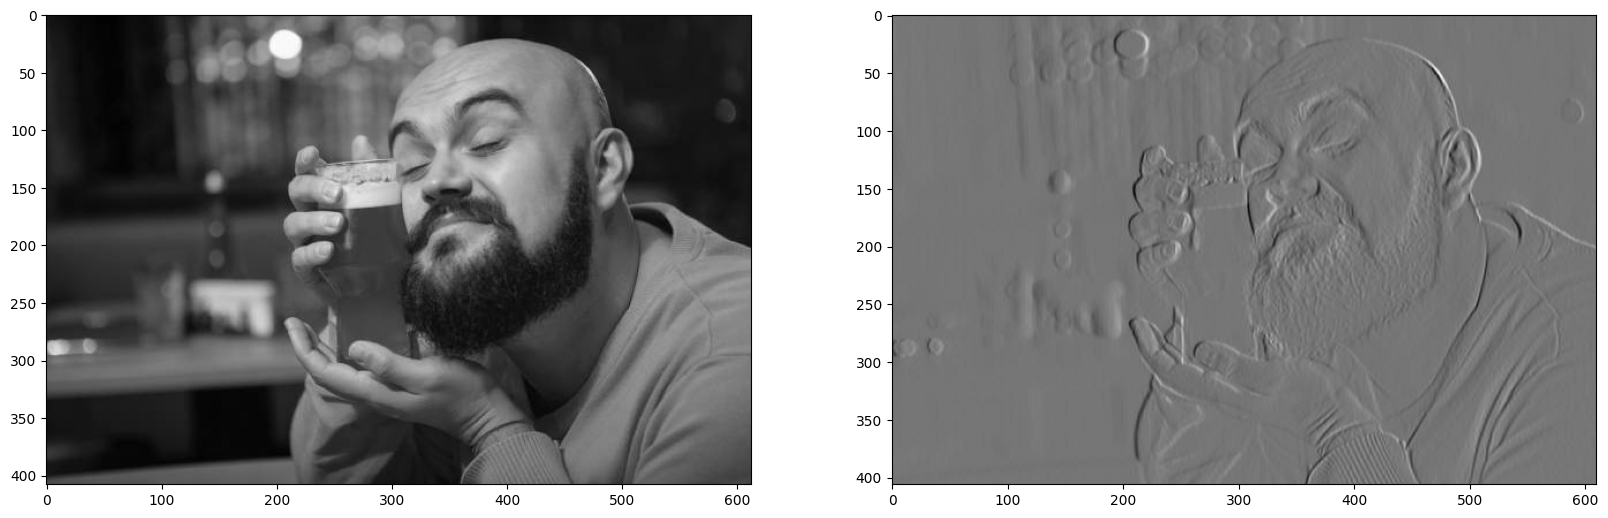

In [ ]:
w = np.array([
    [1., 0., -1.],
    [1., 0., -1.],
    [1., 0., -1.]
])

w = w.astype(np.float32)
weight = torch.from_numpy(w).unsqueeze(0).unsqueeze(0)
result = torch.conv2d(grayscale_img_norm, weight)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_img_norm.squeeze(0).permute(1,2,0), cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(result.squeeze(0).permute(1,2,0), cmap = 'gray')


